## Problem 4

In [105]:
import numpy as np
import matplotlib.pyplot as plt

class Problem4:
    
    def __init__(self, f):
        self.f = f

    def quad_line_search(self, x, s, t, eps, N):
        ''' 
            x (list): arbitrary location in n dimensions
            s (list): arbitrary search direction in n dimensions
            t (int): initial stride
            eps (int): minimum tolerance
            N (int): maximum number of iterations
        '''
        
        plt.plot(*x, '+')
        
        self.x_min = x
        self.s = s
        self.t = t
        self.eps = eps
        i = 0
        
        while i < N:
            g0, g1, g2 = self.generate_points()
            g_min = self.three_pt_quad_min(g0, g1, g2)
            print(g_min)
            self.x_min = self.x_min + g_min[0]*s
            i += 1
            
#             if self.converged([g_min[1], g0[1], g1[1], g2[1]]):
            if self.converged([g_min[1], g0[1]]):
                plt.plot(*self.x_min, 'x')
                plt.show()
                return 'Converged to x = {0} in {1} function calls.'.format(self.x_min, i)
            
            else:
                plt.plot(*self.x_min, 'o', markerfacecolor='None')

        plt.show()
    
    def generate_points(self):
        '''
            
        '''
        g0 = [0, self.f(self.x_min)]
        g1 = [self.t, self.f(self.x_min + self.t*self.s)]
        g2 = [2*self.t, self.f(self.x_min + 2*self.t*self.s)]
        
        return g0, g1, g2
        
    def three_pt_quad_min(self, pt1, pt2, pt3):
        # pt1, pt2, pt3 (list): [x, f(x)]
        # x (num): point to calculate approximate f(x)

        a2_num = ((pt3[1] - pt1[1]) / (pt3[0] - pt1[0])) - ((pt2[1] - pt1[1]) / (pt2[0] - pt1[0]))
        a2 = a2_num / (pt3[0] - pt2[0])
        a1 = ((pt2[1] - pt1[1]) / (pt2[0] - pt1[0])) - a2*(pt1[0] + pt2[0])
        a0 = pt1[1] - a1*pt1[0] - a2*(pt1[0]**2)
    
        pt_min = -a1/(2*a2)
        print(pt_min)
        return [pt_min, a0 + a1*pt_min + a2*(pt_min**2)]



    def converged(self, fs):
        '''
            fs (list): function eval values associated with quadratic polynomial
            eps (int): minimum tolerance
        '''

        max_f = max(fs)
        min_f = min(fs)
        
        tol = abs(max_f - min_f)/max(10**(-8), min_f)
#         print(tol)
        return tol < self.eps

1.50726419878
[1.5072641987828799, 10988.683761410619]
1.11867945487
[1.1186794548692434, 3726.4910654040686]
0.732812980304
[0.73281298030362918, 2336.2375069744598]
0.140732549314
[0.14073254931373141, 2256.4955163149039]
0.000296202067519
[0.00029620206751888541, 2256.4996532858522]


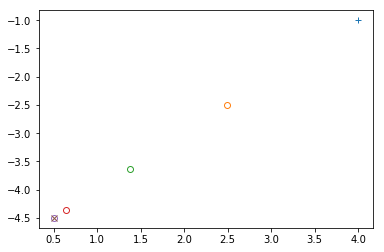

'Converged to x = [ 0.50021461 -4.49978539] in 5 function calls.'

In [109]:
def rosenbrock(x):
    [x1, x2] = x
    term_1 = (1-x1)**2
    term_2 = 100*(x2-(x1**2))**2
    
    return term_1 + term_2

x = np.array([4, -1])
s = np.array([-1, -1])
t = .1
eps = 10**(-4)
N = 100

solve = Problem4(rosenbrock)
solve.quad_line_search(x, s, t, eps, N)